In [1]:
import jax

jax.config.update("jax_platform_name", "cpu")

In [2]:
import numpy as np
import ruptures as rpt
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2
from deepcpd import (
    get_switching_model,
    get_mse_loss,
)

/home/truong/mambaforge/envs/data/lib/python3.9/site-packages/scipy/cluster/vq.py:603: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


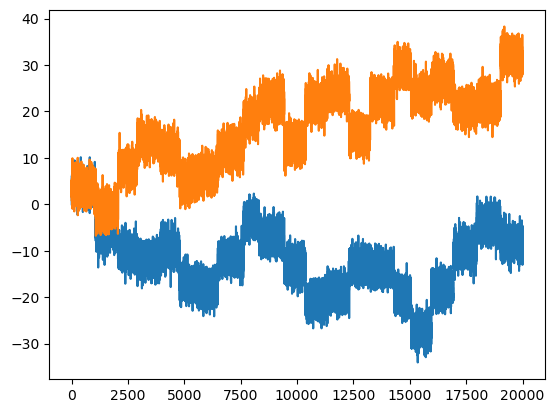

In [9]:
signal, bkps = rpt.pw_constant(20_000, n_bkps=20, n_features=2, noise_std=2)
_ = plt.plot(signal)

centroids, labels = kmeans2(signal, 50)

signal = jnp.array(signal)
centroids = jnp.array(centroids)

In [10]:
optimal_state_sequence = get_switching_model(signal, centroids, penalty=1000)
approximation = centroids[optimal_state_sequence]

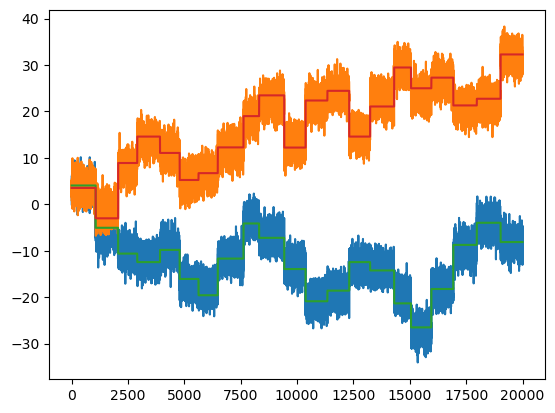

In [11]:
plt.plot(signal)
plt.plot(approximation)

In [12]:
get_mse_loss(signal, centroids, penalty=1000), (
    (signal - approximation) ** 2
).sum() / signal.shape[0]

(Array(9.14966, dtype=float32), Array(9.14966, dtype=float32))